In [1]:
# Init database
from raman.database import collection_finger, collection_blood, collection_ref, reset_collection
reset_collection()
collection_finger.index_information()
collection_blood.index_information()
collection_ref.index_information()

{'_id_': {'v': 2, 'key': [('_id', 1)]},
 'name_1_timestamp_1': {'v': 2,
  'key': [('name', 1), ('timestamp', 1)],
  'unique': True}}

In [2]:
from pathlib import Path
from raman.spectra import Finger, Reference, Blood, load_spectra_of_subject_as_sample
import pandas as pd
import math

In [3]:
# Subject Data

data_path = Path("../data/pilot/")
for subject_id in ["s1", "s2", "s3", "s4", "s5", "s6", "s7", "s8"]:
    print("Saving subject", subject_id)
    df = pd.read_csv(data_path.joinpath(f"{subject_id}.csv"))
    
    for path in data_path.joinpath(subject_id).glob("[0-9]_*txt"):
        print("  ", path)
        spectrum = Finger.from_file(path=path)
        spectrum.subject_id = subject_id
        glucose = df.loc[df.prefix == str(spectrum.id)].glucose.values[0]

        spectrum.glucose = int(glucose) if math.isnan(glucose) == False else None
        spectrum.save()
    for path in data_path.joinpath(subject_id).glob("[0-9][0-9]_*txt"):
        print("  ", path)
        spectrum = Finger.from_file(path=path)
        spectrum.subject_id = subject_id
        glucose = df.loc[df.prefix == str(spectrum.id)].glucose.values[0]

        spectrum.glucose = int(glucose) if math.isnan(glucose) == False else None
        spectrum.save()

Saving subject s1
   ../data/pilot/s1/9_600_785 nm_60 s_1_2024_03_19_09_15_16_01.txt
   ../data/pilot/s1/3_600_785 nm_60 s_1_2024_03_19_08_47_25_01.txt
   ../data/pilot/s1/7_600_785 nm_60 s_1_2024_03_19_09_05_16_01.txt
   ../data/pilot/s1/6_600_785 nm_60 s_1_2024_03_19_09_00_16_01.txt
   ../data/pilot/s1/7_600_785 nm_60 s_1_2024_03_19_09_06_19_01.txt
   ../data/pilot/s1/4_600_785 nm_60 s_1_2024_03_19_08_51_10_01.txt
   ../data/pilot/s1/0_600_785 nm_60 s_1_2024_03_19_08_31_34_01.txt
   ../data/pilot/s1/9_600_785 nm_60 s_1_2024_03_19_09_16_17_01.txt
   ../data/pilot/s1/5_600_785 nm_60 s_1_2024_03_19_08_56_01_01.txt
   ../data/pilot/s1/8_600_785 nm_60 s_1_2024_03_19_09_10_55_01.txt
   ../data/pilot/s1/3_600_785 nm_60 s_1_2024_03_19_08_45_53_01.txt
   ../data/pilot/s1/1_600_785 nm_60 s_1_2024_03_19_08_35_53_01.txt
   ../data/pilot/s1/2_600_785 nm_60 s_1_2024_03_19_08_40_11_01.txt
   ../data/pilot/s1/8_600_785 nm_60 s_1_2024_03_19_09_09_52_01.txt
   ../data/pilot/s1/5_600_785 nm_60 s_1_2024

Found 1 spike(s) in path=, self.remove_spike() is perform automatically.


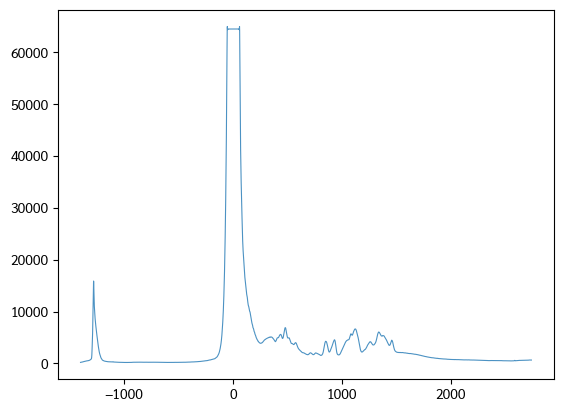

In [ ]:
# # Referece
# glucose = Reference.from_file(path=Path("../data/reference/glucose/10x/txt/glucose_600_785 nm_90 s_1_2024_10_29_15_11_45_01.txt"))
# glucose.save()
# glucose.to_sample().plot()

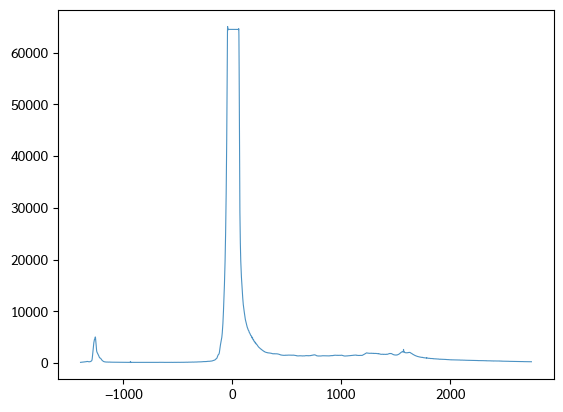

In [ ]:
# blood = Reference.from_file(path=Path("../data/blood/98vs186/blood98-40_600_785 nm_120 s_5_2024_09_05_09_30_44_01.txt"))
# blood.name = "blood"
# blood.save()
# blood.to_sample().plot()

Found 1 spike(s) in path=, self.remove_spike() is perform automatically.


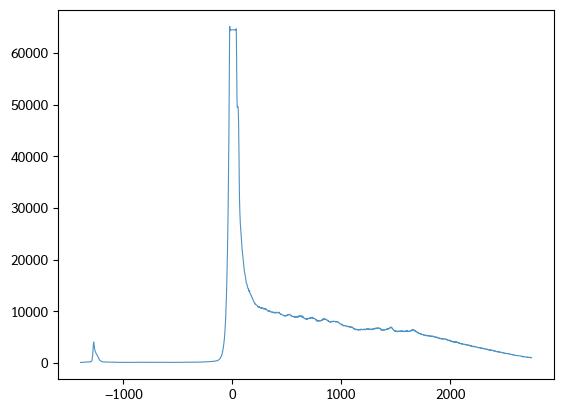

In [ ]:
# skin = Reference.from_file(path=Path("../data/skin/txt/skin1_600_785 nm_30 s_1_2024_12_09_13_41_06_01.txt"))
# skin.name = "skin"
# skin.save()
# skin.to_sample().plot()

In [7]:
samples = load_spectra_of_subject_as_sample(subject_id="s1")

Found 3 spike(s) in path=, self.remove_spike() is perform automatically.
Found 1 spike(s) in path=, self.remove_spike() is perform automatically.
Found 2 spike(s) in path=, self.remove_spike() is perform automatically.
Found 1 spike(s) in path=, self.remove_spike() is perform automatically.
Found 1 spike(s) in path=, self.remove_spike() is perform automatically.
Found 2 spike(s) in path=, self.remove_spike() is perform automatically.
Found 2 spike(s) in path=, self.remove_spike() is perform automatically.
Found 1 spike(s) in path=, self.remove_spike() is perform automatically.
Found 1 spike(s) in path=, self.remove_spike() is perform automatically.
Found 1 spike(s) in path=, self.remove_spike() is perform automatically.
Found 2 spike(s) in path=, self.remove_spike() is perform automatically.
Found 1 spike(s) in path=, self.remove_spike() is perform automatically.
Found 1 spike(s) in path=, self.remove_spike() is perform automatically.
Found 1 spike(s) in path=, self.remove_spike() is p

In [8]:
samples

[
   Sample: s1_0
     date: 2024-03-19 08:31:34
  grating: 600
    laser: 785
    power: 7.0
     lens: x10
 exposure: 60 s
     accu: 1
     stat: Max=64681.64 Min=227.11 Mean=8645.89 Std=12670.24,
 
   Sample: s1_1
     date: 2024-03-19 08:35:53
  grating: 600
    laser: 785
    power: 7.0
     lens: x10
 exposure: 60 s
     accu: 1
     stat: Max=64920.16 Min=208.0 Mean=7658.1 Std=12275.85,
 
   Sample: s1_2
     date: 2024-03-19 08:40:11
  grating: 600
    laser: 785
    power: 7.0
     lens: x10
 exposure: 60 s
     accu: 1
     stat: Max=64727.89 Min=221.93 Mean=8691.73 Std=12672.23,
 
   Sample: s1_3
     date: 2024-03-19 08:45:53
  grating: 600
    laser: 785
    power: 7.0
     lens: x10
 exposure: 60 s
     accu: 1
     stat: Max=64815.49 Min=224.32 Mean=9588.08 Std=12934.65,
 
   Sample: s1_3
     date: 2024-03-19 08:47:25
  grating: 600
    laser: 785
    power: 7.0
     lens: x10
 exposure: 60 s
     accu: 1
     stat: Max=64570.2 Min=225.36 Mean=9424.87 Std=12991.06,
 
 

In [4]:
# Import Blood 
for path in Path("../data/blood/emsc/").glob("*.txt"):
    blood = Blood.from_file(path=path)
    blood.save()

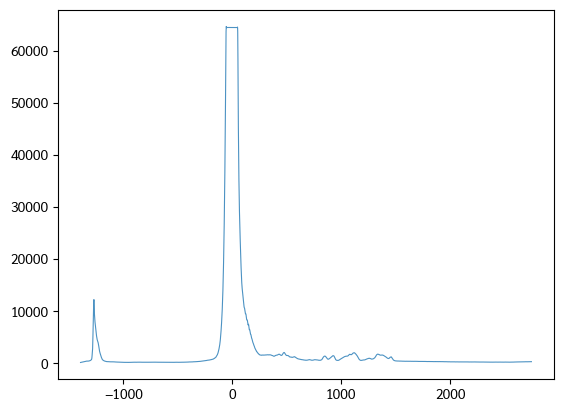

In [5]:
# Referece
glucose = Reference.from_file(path=Path("../data/reference/glucose/macro/glucose_macro_0-71_0-10_600_785 nm_30 s_5_2025_06_09_17_24_33_01.txt"))
glucose.save()
glucose.to_sample().plot()